In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 32.4 MB/s 
     |████████████████████████████████| 16.6 MB 62.6 MB/s 
     |████████████████████████████████| 7.8 MB 64.8 MB/s 


In [2]:
import matplotlib.font_manager

In [3]:
pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=6511d6bd6326d0fa38696eb43258250956e723842b6be08cb936d9144679d2e6
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built adjustText


In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
from shapely.geometry import Point
import adjustText as aT

In [5]:
fp = "drive/MyDrive/Colab Notebooks/Indianstate/India_State_Boundary.shp"
map_df = gpd.read_file(fp)
map_df.head()

,State_Name,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223..."
3,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
4,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392..."


In [6]:
map_df.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
map_df = map_df.to_crs("EPSG:3395")

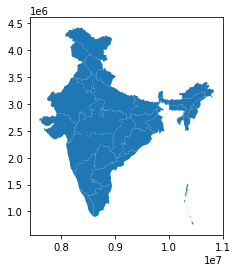

In [8]:
map_df = map_df[['State_Name', 'geometry']]
map_df.plot()

In [9]:
map_df.State_Name

0                            Andaman & Nicobar
1                                   Chandigarh
2     Daman and Diu and Dadra and Nagar Haveli
3                                        Delhi
4                                      Haryana
5                                    Jharkhand
6                                    Karnataka
7                                       Kerala
8                                  Lakshadweep
9                               Madhya Pradesh
10                                 Maharashtra
11                                      Odisha
12                                  Puducherry
13                                   Tamilnadu
14                               Chhattishgarh
15                                   Telengana
16                              Andhra Pradesh
17                                  Puducherry
18                                         Goa
19                            Himachal Pradesh
20                                      Punjab
21           

In [10]:
map_df['State_Name'] = map_df['State_Name'].str.upper()
map_df.head()

,State_Name,geometry
0,ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1439992.056, 1034..."
1,CHANDIGARH,"POLYGON ((8546255.616 3584178.689, 8546315.400..."
2,DAMAN AND DIU AND DADRA AND NAGAR HAVELI,"MULTIPOLYGON (((8122247.822 2297594.513, 81223..."
3,DELHI,"POLYGON ((8583390.570 3338489.968, 8583476.212..."
4,HARYANA,"POLYGON ((8524318.539 3495065.089, 8524451.392..."


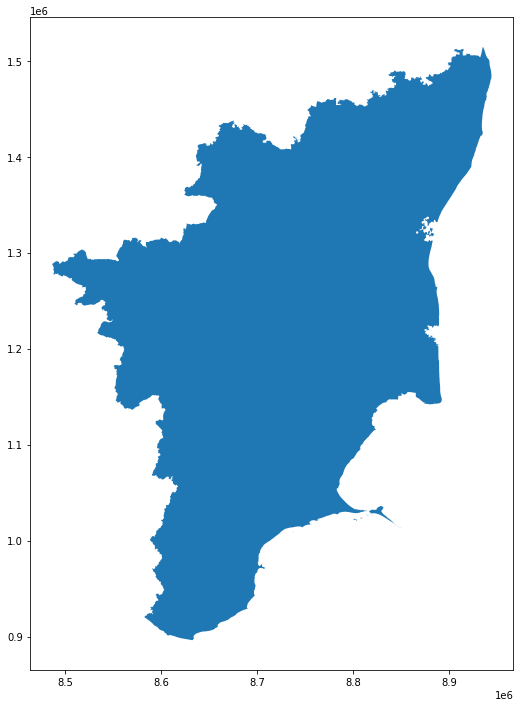

In [11]:
map_df[map_df['State_Name'] == 'TAMILNADU'].plot(figsize=(12, 12))

In [12]:
map_df.State_Name

0                            ANDAMAN & NICOBAR
1                                   CHANDIGARH
2     DAMAN AND DIU AND DADRA AND NAGAR HAVELI
3                                        DELHI
4                                      HARYANA
5                                    JHARKHAND
6                                    KARNATAKA
7                                       KERALA
8                                  LAKSHADWEEP
9                               MADHYA PRADESH
10                                 MAHARASHTRA
11                                      ODISHA
12                                  PUDUCHERRY
13                                   TAMILNADU
14                               CHHATTISHGARH
15                                   TELENGANA
16                              ANDHRA PRADESH
17                                  PUDUCHERRY
18                                         GOA
19                            HIMACHAL PRADESH
20                                      PUNJAB
21           

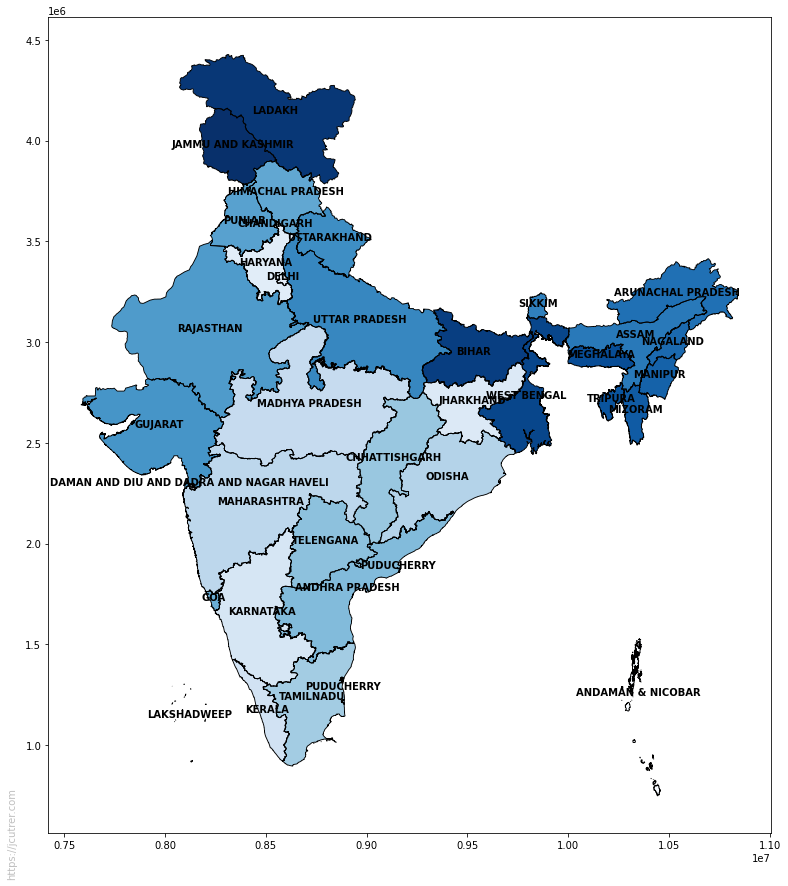

In [13]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(s=x.State_Name, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10,fontweight="bold"),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=.9)
map_df.plot(ax=ax, cmap='Blues', figsize=(12, 12))
ax.text(-0.05, 0., 'https://jcutrer.com', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

plt.rcParams.update({'font.sans-serif':'Helvetica'})

In [14]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/dataset_original/RS_Session_256_AU_1659_1.csv")
df.head()

,Sl. No.,State/UT,2018 - Cases Registered (CR),2019 - Cases Registered (CR),2020 - Cases Registered (CR),State Code
0,1,Andhra Pradesh,7.0,6.0,7,AD
1,2,Arunachal Pradesh,0.0,0.0,0,AR
2,3,Assam,7.0,8.0,4,AS
3,4,Bihar,12.0,15.0,3,BR
4,5,Chhattishgarh,1.0,1.0,1,CG


In [15]:
df['State/UT'] = df['State/UT'].str.upper()
df.fillna(0,inplace=True)
df.head()

,Sl. No.,State/UT,2018 - Cases Registered (CR),2019 - Cases Registered (CR),2020 - Cases Registered (CR),State Code
0,1,ANDHRA PRADESH,7.0,6.0,7,AD
1,2,ARUNACHAL PRADESH,0.0,0.0,0,AR
2,3,ASSAM,7.0,8.0,4,AS
3,4,BIHAR,12.0,15.0,3,BR
4,5,CHHATTISHGARH,1.0,1.0,1,CG


In [ ]:
df['State/UT'] = df['State/UT'].str.upper()
df.fillna(0,inplace=True)
df.head()

,Sl. No.,State/UT,2018 - Cases Registered (CR),2019 - Cases Registered (CR),2020 - Cases Registered (CR),State Code
0,1,ANDHRA PRADESH,7.0,6.0,7,AD
1,2,ARUNACHAL PRADESH,0.0,0.0,0,AR
2,3,ASSAM,7.0,8.0,4,AS
3,4,BIHAR,12.0,15.0,3,BR
4,5,CHHATTISHGARH,1.0,1.0,1,CG


In [ ]:
Total_cases = df['2018 - Cases Registered (CR)'] + df['2019 - Cases Registered (CR)'] + df['2020 - Cases Registered (CR)']
Total_cases

0      20.0
1       0.0
2      19.0
3      30.0
4       3.0
5       1.0
6      27.0
7      16.0
8       1.0
9       2.0
10     19.0
11     27.0
12     34.0
13     24.0
14      1.0
15      2.0
16      0.0
17      0.0
18     34.0
19     29.0
20     20.0
21      0.0
22     18.0
23     17.0
24      9.0
25    115.0
26      5.0
27    160.0
28      0.0
29      1.0
30      0.0
31     23.0
32      2.0
33      0.0
34      0.0
35      0.0
dtype: float64

In [ ]:
df['Total_cases'] = Total_cases
df.head()

,Sl. No.,State/UT,2018 - Cases Registered (CR),2019 - Cases Registered (CR),2020 - Cases Registered (CR),State Code,Total_cases
0,1,ANDHRA PRADESH,7.0,6.0,7,AD,20.0
1,2,ARUNACHAL PRADESH,0.0,0.0,0,AR,0.0
2,3,ASSAM,7.0,8.0,4,AS,19.0
3,4,BIHAR,12.0,15.0,3,BR,30.0
4,5,CHHATTISHGARH,1.0,1.0,1,CG,3.0


In [ ]:
df.rename(columns = {'State/UT':'State_Name'}, inplace = True)
df.rename(columns = {'State Code':'State_code'}, inplace = True)
df.shape

(36, 7)

In [ ]:
map_df = map_df.merge(df,on='State_Name')
map_df.head()

,State_Name,geometry,Sl. No.,2018 - Cases Registered (CR),2019 - Cases Registered (CR),2020 - Cases Registered (CR),State_code,Total_cases
0,ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1439992.056, 1034...",29,0.0,0.0,0,AN,0.0
1,CHANDIGARH,"POLYGON ((8546255.616 3584178.689, 8546315.400...",30,0.0,0.0,1,CH,1.0
2,DAMAN AND DIU AND DADRA AND NAGAR HAVELI,"MULTIPOLYGON (((8122247.822 2297594.513, 81223...",31,0.0,0.0,0,DNHDD,0.0
3,DELHI,"POLYGON ((8583390.570 3338489.968, 8583476.212...",32,11.0,10.0,2,DL,23.0
4,HARYANA,"POLYGON ((8524318.539 3495065.089, 8524451.392...",8,5.0,5.0,6,HR,16.0


In [ ]:
convert_dict = {'Total_cases': int
                }
map_df = map_df.astype(convert_dict)

In [ ]:
map_df.head()

,State_Name,geometry,Sl. No.,2018 - Cases Registered (CR),2019 - Cases Registered (CR),2020 - Cases Registered (CR),State_code,Total_cases
0,ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1439992.056, 1034...",29,0.0,0.0,0,AN,0
1,CHANDIGARH,"POLYGON ((8546255.616 3584178.689, 8546315.400...",30,0.0,0.0,1,CH,1
2,DAMAN AND DIU AND DADRA AND NAGAR HAVELI,"MULTIPOLYGON (((8122247.822 2297594.513, 81223...",31,0.0,0.0,0,DNHDD,0
3,DELHI,"POLYGON ((8583390.570 3338489.968, 8583476.212...",32,11.0,10.0,2,DL,23
4,HARYANA,"POLYGON ((8524318.539 3495065.089, 8524451.392...",8,5.0,5.0,6,HR,16


In [ ]:
map_df.shape

(37, 8)

In [ ]:
merged_df = map_df.set_index('State_Name')
merged_df.head()

,geometry,Sl. No.,2018 - Cases Registered (CR),2019 - Cases Registered (CR),2020 - Cases Registered (CR),State_code,Total_cases
State_Name,,,,,,,
ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1439992.056, 1034...",29,0.0,0.0,0,AN,0
CHANDIGARH,"POLYGON ((8546255.616 3584178.689, 8546315.400...",30,0.0,0.0,1,CH,1
DAMAN AND DIU AND DADRA AND NAGAR HAVELI,"MULTIPOLYGON (((8122247.822 2297594.513, 81223...",31,0.0,0.0,0,DNHDD,0
DELHI,"POLYGON ((8583390.570 3338489.968, 8583476.212...",32,11.0,10.0,2,DL,23
HARYANA,"POLYGON ((8524318.539 3495065.089, 8524451.392...",8,5.0,5.0,6,HR,16


In [ ]:
merged_df = merged_df.drop(['Sl. No.', '2018 - Cases Registered (CR)','2019 - Cases Registered (CR)','2020 - Cases Registered (CR)'], axis=1)

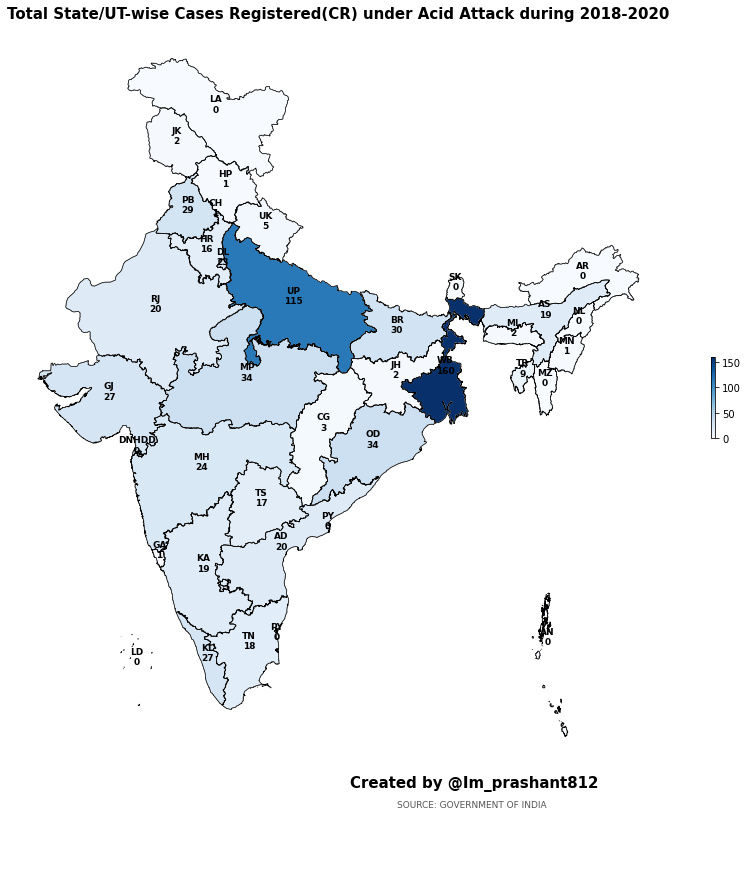

In [ ]:
import math
fig = plt.figure(1, figsize=(15,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(
    s=x.State_code + "\n" + str(x.Total_cases), 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=9,fontweight="bold"
),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=0.6)
map_df.plot(ax=ax, cmap='Blues', figsize=(12, 12))


ax.axis('off')
ax.set_title('Total State/UT-wise Cases Registered(CR) under Acid Attack during 2018-2020', fontdict={'fontsize': '15', 'fontweight' : 'bold','fontname':'Helvetica'})
ax.annotate('SOURCE: GOVERNMENT OF INDIA',xy=(0.53, 0.08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
ax.annotate('Created by @Im_prashant812',xy=(0.8, 0.1),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')

map_df.plot(column=map_df.Total_cases, cmap='Blues', linewidth=0.9, ax=ax, edgecolor='0.6', legend=False)
plt.rcParams.update({'font.sans-serif':'Helvetica'})

vmin, vmax = 0, 160
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,fraction = 0.16,shrink = 0.1)

#map_df.plot(column=Total_cases, cmap='Reds', linewidth=0.6, ax=ax, edgecolor='0.6', legend=True)

In [ ]:
merged_df.head()

,geometry,State_code,Total_cases
State_Name,,,
ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1439992.056, 1034...",AN,0
CHANDIGARH,"POLYGON ((8546255.616 3584178.689, 8546315.400...",CH,1
DAMAN AND DIU AND DADRA AND NAGAR HAVELI,"MULTIPOLYGON (((8122247.822 2297594.513, 81223...",DNHDD,0
DELHI,"POLYGON ((8583390.570 3338489.968, 8583476.212...",DL,23
HARYANA,"POLYGON ((8524318.539 3495065.089, 8524451.392...",HR,16


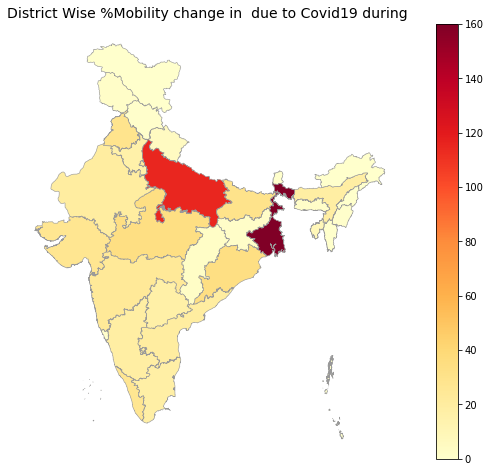

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.axis('off')
ax.set_title('District Wise %Mobility change in  due to Covid19 during ', fontdict={'fontsize': '14', 'fontweight' : '3'})
  
merged_df.plot(column=merged_df.Total_cases, cmap='YlOrRd', linewidth=0.6, ax=ax, edgecolor='0.6', legend=True)

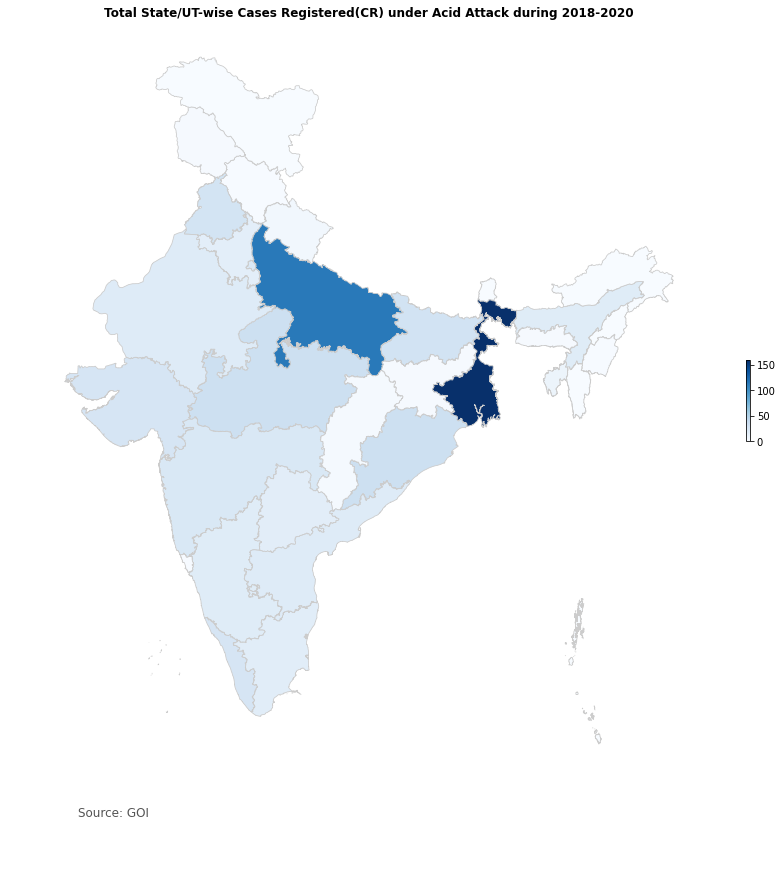

In [ ]:
import matplotlib as mpl
variable = map_df.Total_cases
vmin, vmax = 0, 160
fig, ax = plt.subplots(1, figsize=(15, 15))
map_df.plot(column=variable, cmap='Blues', ax = ax, linewidth=0.8, edgecolor='0.8')
ax.axis('off')
ax.set_title('Total State/UT-wise Cases Registered(CR) under Acid Attack during 2018-2020', fontdict={'fontsize': '12', 'fontweight' : 'bold'})
ax.annotate('Source: GOI',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,fraction = 0.15,shrink = 0.1)
